3/3 [==============================] - 0s 3ms/step
Confusion Matrix:
[[39  0]
 [ 2 28]]
Accuracy: 0.9710144927536232
Precision: 1.0
Recall: 0.9333333333333333
F1 Score: 0.9655172413793104
Total Parameters: 10


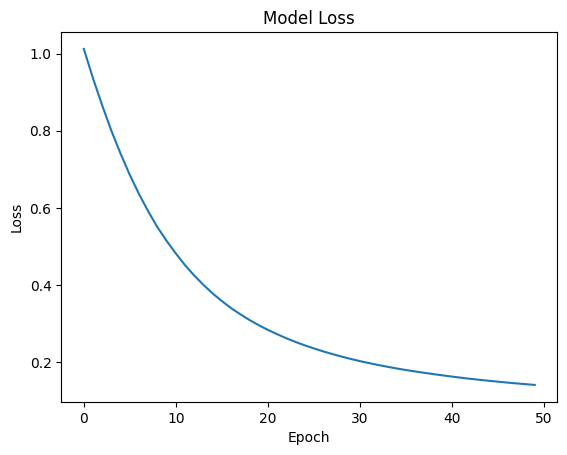

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Data Loading and Preprocessing
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names"

# Load the data
column_names = ["ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                "Normal Nucleoli", "Mitoses", "Class"]
data = pd.read_csv(url_data, names=column_names)

# Preprocessing
# Replace '?' with NaN and convert 'Bare Nuclei' to numeric
data.replace('?', np.nan, inplace=True)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])

# Drop rows with missing values
data.dropna(inplace=True)

# Convert Class label to binary (2: benign, 4: malignant)
data['Class'] = data['Class'].map({2: 0, 4: 1})

# Split data into features and target
X = data.drop(['ID', 'Class'], axis=1)
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Architecture
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Step 3: Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
# Step 4: Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to obtain predicted classes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Total Parameters:", model.count_params())

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



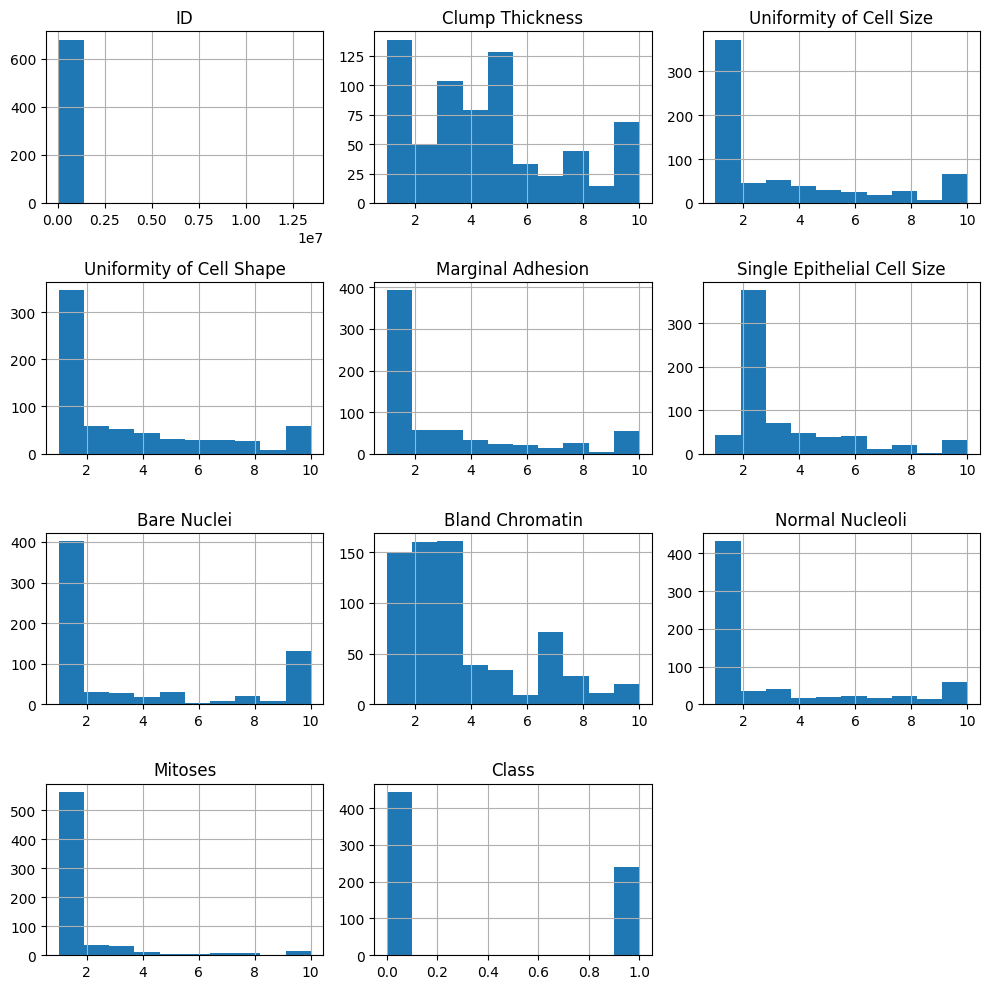

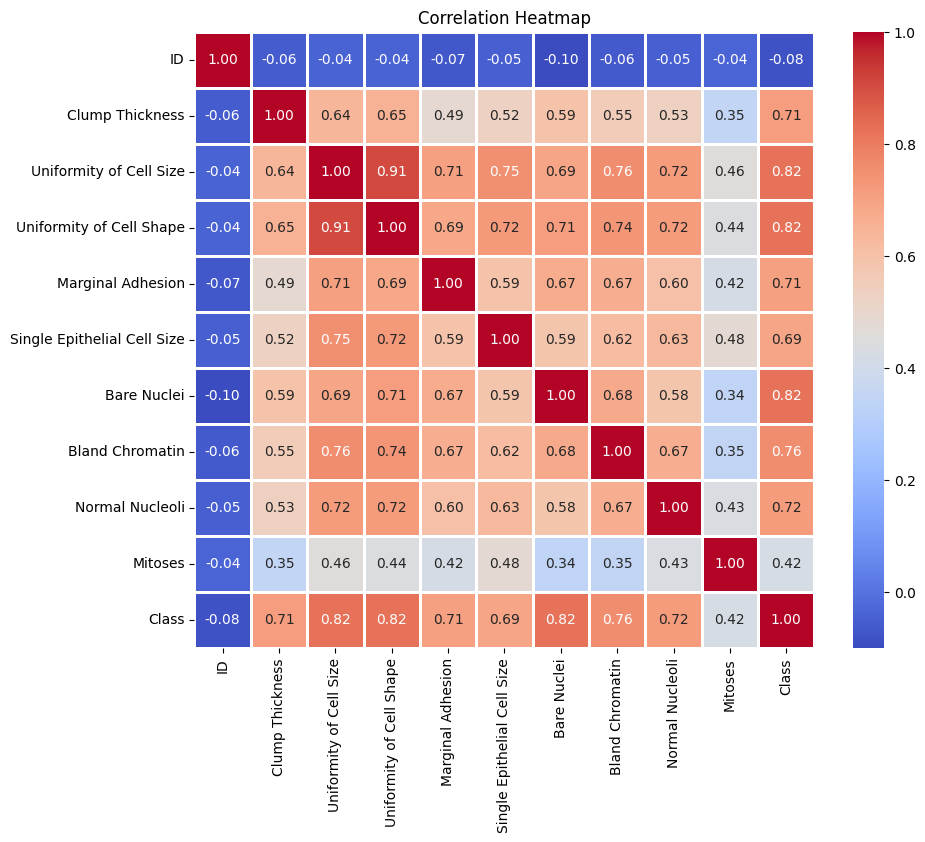

In [ ]:
import seaborn as sns

# Histogram of features
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Correlation scatter plot
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


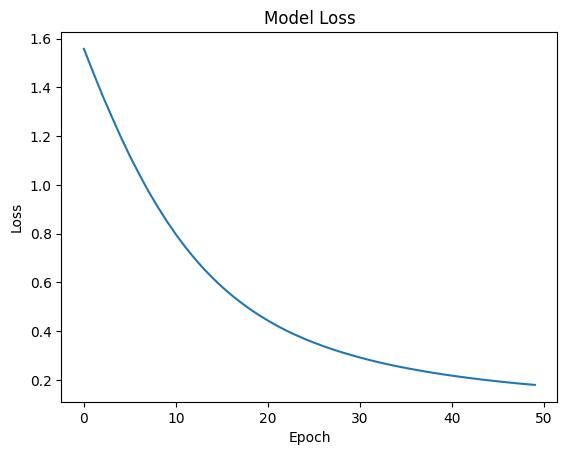

In [ ]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

